# Models

In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing data
df=pd.read_csv('C:/Users/bd/lighthouse-data-notes/Week_5/Day_5/mid-term-project-I/fligths_newvafupa.csv')
pd.set_option('display.max_columns',100)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,mkt_unique_carrier,op_unique_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,dep_time,crs_dep_time,crs_arr_time,crs_elapsed_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,actual_elapsed_time,air_time,distance,year,month,minutes,hours,arr_delay,proba_delay_origin,proba_delay_dest,proba_delay_distance,proba_delay_month,proba_delay_hour,weight_delay_hour,perc_total_gallon,perc_passenger,total_gallon_carrier,perc_dep_delay,perc_passenger_carrier
0,0,0,0,8,21,2094,12266,12953,1742.0,1630,2102,212,72.0,12.0,1754.0,2149.0,37.0,2226.0,224.0,175.0,1416,2019,6,26.0,22,84.0,17.353601,24.566415,2.509692,75.994695,80.748827,80.748827,9.349648,8.925785,4.370951,0.418572,2.800740
1,1,1,1,3,7,2953,12889,14869,1543.0,1407,1630,83,96.0,24.0,1607.0,1803.0,5.0,1808.0,85.0,56.0,368,2019,10,8.0,18,98.0,3.417670,15.119363,1.662926,21.618037,40.522342,40.522342,6.983655,7.327001,4.370951,0.326987,16.464856
2,2,2,2,2,4,952,13204,10721,1419.0,1303,1601,178,76.0,13.0,1432.0,1705.0,10.0,1715.0,176.0,153.0,1121,2019,4,15.0,17,74.0,13.997143,9.630688,0.438686,31.391553,32.768823,32.768823,8.606658,7.037544,4.370951,0.520165,16.464856
3,3,3,3,8,25,3433,11292,11109,1357.0,1400,1447,47,-3.0,10.0,1407.0,1426.0,6.0,1432.0,35.0,19.0,73,2018,7,32.0,14,-15.0,18.445215,3.744134,1.968986,89.746990,6.008978,6.008978,9.735205,8.919520,4.370951,0.391364,9.519185
4,4,4,4,0,17,5206,11617,11057,905.0,911,1044,93,-6.0,13.0,918.0,1004.0,10.0,1014.0,69.0,46.0,221,2019,9,14.0,10,-30.0,-0.214242,7.671904,0.367272,4.458274,-16.404815,-16.404815,8.570351,7.640727,0.000000,0.275866,0.000000


In [4]:
#Picking features for our model
data=df[['mkt_unique_carrier','op_unique_carrier','mkt_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','crs_arr_time','crs_elapsed_time','distance','year','month','minutes','hours','proba_delay_origin','proba_delay_dest','proba_delay_distance','proba_delay_month','weight_delay_hour','perc_total_gallon','perc_passenger','total_gallon_carrier','perc_dep_delay','perc_passenger_carrier','arr_delay']]
data.head()

,mkt_unique_carrier,op_unique_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,minutes,hours,proba_delay_origin,proba_delay_dest,proba_delay_distance,proba_delay_month,weight_delay_hour,perc_total_gallon,perc_passenger,total_gallon_carrier,perc_dep_delay,perc_passenger_carrier,arr_delay
0,8,21,2094,12266,12953,1630,2102,212,1416,2019,6,26.0,22,17.353601,24.566415,2.509692,75.994695,80.748827,9.349648,8.925785,4.370951,0.418572,2.800740,84.0
1,3,7,2953,12889,14869,1407,1630,83,368,2019,10,8.0,18,3.417670,15.119363,1.662926,21.618037,40.522342,6.983655,7.327001,4.370951,0.326987,16.464856,98.0
2,2,4,952,13204,10721,1303,1601,178,1121,2019,4,15.0,17,13.997143,9.630688,0.438686,31.391553,32.768823,8.606658,7.037544,4.370951,0.520165,16.464856,74.0
3,8,25,3433,11292,11109,1400,1447,47,73,2018,7,32.0,14,18.445215,3.744134,1.968986,89.746990,6.008978,9.735205,8.919520,4.370951,0.391364,9.519185,-15.0
4,0,17,5206,11617,11057,911,1044,93,221,2019,9,14.0,10,-0.214242,7.671904,0.367272,4.458274,-16.404815,8.570351,7.640727,0.000000,0.275866,0.000000,-30.0


In [23]:
data.isnull().sum()

mkt_unique_carrier        0
op_unique_carrier         0
mkt_carrier_fl_num        0
origin_airport_id         0
dest_airport_id           0
crs_dep_time              0
crs_arr_time              0
crs_elapsed_time          0
distance                  0
year                      0
month                     0
minutes                   0
hours                     0
proba_delay_origin        0
proba_delay_dest          0
proba_delay_distance      0
proba_delay_month         0
weight_delay_hour         0
perc_total_gallon         0
perc_passenger            0
total_gallon_carrier      0
perc_dep_delay            0
perc_passenger_carrier    0
arr_delay                 0
dtype: int64

In [24]:
data.corr()

,mkt_unique_carrier,op_unique_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,minutes,hours,proba_delay_origin,proba_delay_dest,proba_delay_distance,proba_delay_month,weight_delay_hour,perc_total_gallon,perc_passenger,total_gallon_carrier,perc_dep_delay,perc_passenger_carrier,arr_delay
mkt_unique_carrier,1.000000,0.595233,-0.055887,0.021852,0.034386,0.011094,0.016150,-0.025766,0.007132,-0.013892,-0.010484,-0.016440,0.013508,-0.005623,-0.113690,0.011169,0.003335,0.021933,0.012916,-0.007720,0.092097,0.059744,0.191958,0.001442
op_unique_carrier,0.595233,1.000000,0.258053,0.029031,0.059494,0.012389,0.008956,-0.196454,-0.173990,-0.002891,-0.012388,0.000976,0.009026,-0.000795,-0.142519,0.015137,-0.006803,0.002739,0.016132,-0.002962,0.017862,0.028844,0.055728,-0.002931
mkt_carrier_fl_num,-0.055887,0.258053,1.000000,-0.030513,-0.031173,0.004888,0.015039,-0.332105,-0.363234,-0.022589,0.025405,0.010620,0.012699,0.005670,-0.086897,0.023513,-0.013835,-0.024840,-0.010177,-0.013963,-0.048515,-0.029537,-0.145742,0.022854
origin_airport_id,0.021852,0.029031,-0.030513,1.000000,0.019642,-0.030083,0.000505,0.055872,0.079602,-0.016038,0.005345,-0.007860,0.015279,-0.088639,0.011339,-0.002729,0.001907,0.004473,-0.010884,0.008325,0.158704,-0.055081,-0.105435,-0.007413
dest_airport_id,0.034386,0.059494,-0.031173,0.019642,1.000000,0.035921,0.016226,0.084655,0.073950,0.001039,-0.008295,0.015193,0.012482,0.021181,0.047220,0.006452,-0.007472,0.016801,-0.004972,0.006704,0.015777,-0.009129,0.029428,0.017943
crs_dep_time,0.011094,0.012389,0.004888,-0.030083,0.035921,1.000000,0.680452,-0.017395,-0.008015,0.007399,-0.010684,0.004291,0.604559,0.078475,-0.085212,0.030758,-0.019954,0.867259,-0.001745,0.000289,-0.041356,0.022751,0.017948,0.090025
crs_arr_time,0.016150,0.008956,0.015039,0.000505,0.016226,0.680452,1.000000,0.013819,0.010181,-0.002247,-0.005861,0.007459,0.852999,0.078632,-0.049901,0.010866,-0.022147,0.796819,-0.008938,-0.003565,-0.031480,0.021134,0.012860,0.069889
crs_elapsed_time,-0.025766,-0.196454,-0.332105,0.055872,0.084655,-0.017395,0.013819,1.000000,0.982582,0.019929,-0.021506,0.011243,0.009427,0.029270,0.155241,-0.092166,0.004258,0.068337,-0.003217,-0.000500,0.053501,0.036486,0.055678,-0.011850
distance,0.007132,-0.173990,-0.363234,0.079602,0.073950,-0.008015,0.010181,0.982582,1.000000,0.014642,-0.014772,0.007874,0.005921,0.016311,0.121056,-0.106780,0.009237,0.077012,0.007643,0.006458,0.058269,0.025139,0.074364,-0.012572
year,-0.013892,-0.002891,-0.022589,-0.016038,0.001039,0.007399,-0.002247,0.019929,0.014642,1.000000,0.001797,-0.013498,-0.005190,-0.007123,0.010288,0.007829,0.004040,0.004578,0.005651,0.005836,-0.008587,-0.008831,0.004681,-0.003692


In [ ]:
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(df)

In [ ]:
'mkt_carrier_fl_num','year','proba_delay_dest','proba_delay_dest','proba_delay_distance','weight_delay_hour','perc_dep_delay','origin_airport_id'

In [22]:
import statsmodels.api as sm

y=data['arr_delay']
X=data[['mkt_carrier_fl_num','year','crs_dep_time','hours','crs_arr_time','perc_dep_delay','proba_delay_dest']]#,'proba_delay_distance','weight_delay_hour']]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                                 OLS Regression Results                                
Dep. Variable:              arr_delay   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              105.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                   6.71e-150
Time:                        15:21:02   Log-Likelihood:                         -51113.
No. Observations:                9802   AIC:                                  1.022e+05
Df Residuals:                    9795   BIC:                                  1.023e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [21]:
y=data['arr_delay']
X=data.drop(columns=['arr_delay'])
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                                 OLS Regression Results                                
Dep. Variable:              arr_delay   R-squared (uncentered):                   0.164
Model:                            OLS   Adj. R-squared (uncentered):              0.162
Method:                 Least Squares   F-statistic:                              83.44
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:17:14   Log-Likelihood:                         -50592.
No. Observations:                9802   AIC:                                  1.012e+05
Df Residuals:                    9779   BIC:                                  1.014e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

# Linear regression

In [17]:
# Initializing a LR model
#We are going to analize Generalized Linear Model Regression 
#and see which features are influencing our target feature
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#y=data['arr_delay']
#X=data.drop(columns=['arr_delay'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True,random_state=0)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#try scaling data first and then follow w4d3

LinearRegression()

In [19]:
# Check performance on train and test set
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train R^2:\t{r2_train}\n\
Test R^2:\t{r2_test}')

Train R^2:	0.15307732414999276
Test R^2:	0.09710638329303489


# Polynomial regresion

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial feature set and train model
polinomial = PolynomialFeatures(degree=2)

Xpoly_train = polinomial.fit_transform(X_train)
Xpoly_test = polinomial.transform(X_test)

print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Predictions
model.fit(Xpoly_train, y_train)
ypoly_train_pred = model.predict(Xpoly_train)
ypoly_test_pred = model.predict(Xpoly_test)

# Check performance on train and test set
r2poly_train = r2_score(y_train, ypoly_train_pred)
r2poly_test = r2_score(y_test, ypoly_test_pred)
print(f'Train R^2:\t{r2poly_train}\nTest R^2:\t{r2poly_test}')

Number of polynomial features: 55
Train R^2:	0.30576082910761493
Test R^2:	0.15434477525159152


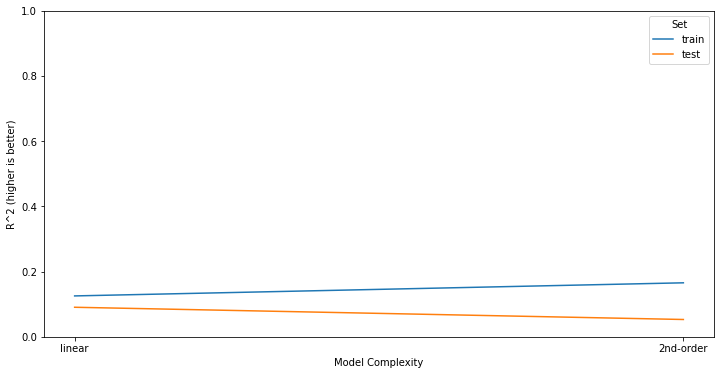

In [13]:
# Show performance of all models on train and test set
import matplotlib.pyplot as plt
import seaborn as sns
show = pd.DataFrame({'Model Complexity': ['linear', 'linear', '2nd-order', '2nd-order'],
                  'R^2': [r2_train, r2_test, r2poly_train, r2poly_test],
                  'Set': ['train', 'test', 'train', 'test']})
show['R^2'] = show['R^2'].clip(lower=0)    # Threshold minimum R^2 to 0 for nicer display of results (if it's 0, we already know it learned nothing)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Complexity', y='R^2', hue='Set', data=show, sort=False)
plt.ylim(ymin=0, ymax=1)
plt.ylabel('R^2 (higher is better)')
plt.show()

# Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# Plotting some features

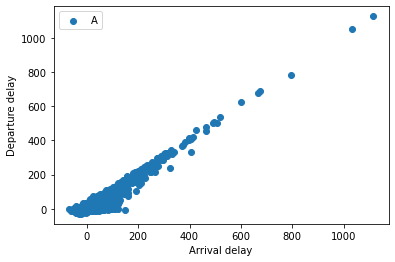

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['arr_delay'],data['dep_delay'])
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')
plt.legend('Arrival vs departure delay')
plt.show()

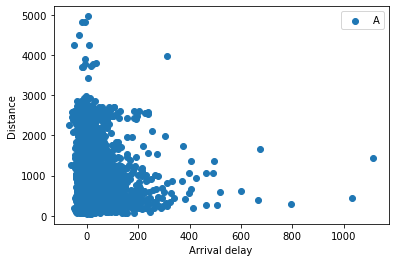

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data['arr_delay'],data['distance'])
plt.xlabel('Arrival delay')
plt.ylabel('Distance')
plt.legend('Arrival delay vs distance')
plt.show()

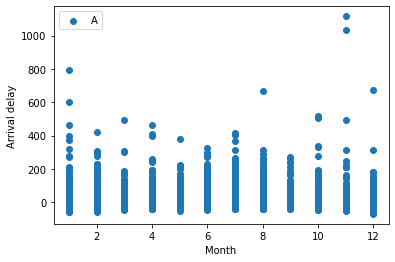

In [24]:
plt.scatter(data['month'],data['arr_delay'])
plt.xlabel('Month')
plt.ylabel('Arrival delay')
plt.legend('Arrival delay vs distance')
plt.show()

C:\Users\bd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

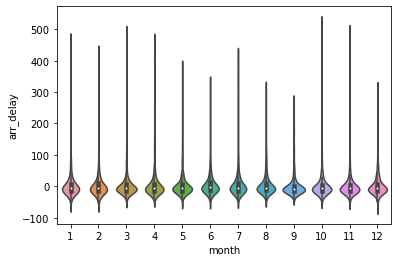

In [28]:
#plotting arrival delays and Months using violin chart
#we removed outliers points
import seaborn as sns
y=data[data['arr_delay']<600]
sns.violinplot(data['month'],y['arr_delay'])

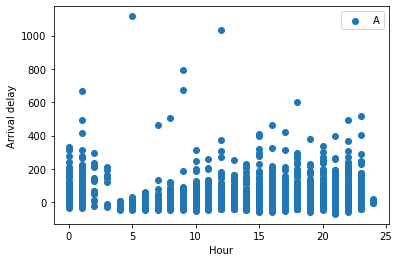

In [25]:
plt.scatter(data['hours'],data['arr_delay'])
plt.xlabel('Hour')
plt.ylabel('Arrival delay')
plt.legend('Arrival delay vs distance')
plt.show()

C:\Users\bd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours', ylabel='arr_delay'>

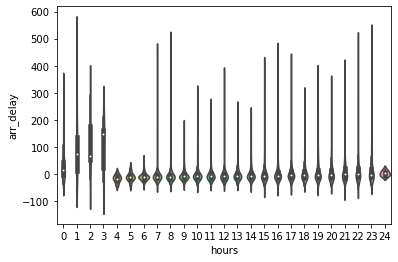

In [29]:
#plottin arrival delays and hours using violin chart
#we removed outliers points
import seaborn as sns
y=data[data['arr_delay']<600]
sns.violinplot(data['hours'],y['arr_delay'])

In [30]:
formula = 'arr_delay ~ origin_airport_id + dest_airport_id + dep_delay + taxi_out + taxi_in + month '
model = smf.glm(formula = formula, data=data, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              arr_delay   No. Observations:                 9802
Model:                            GLM   Df Residuals:                     9795
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Sep 2021   Deviance:                   1.7880e+07
Time:                        20:19:28   Pearson chi2:                 9.30e+22
No. Iterations:                    16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.806e+18   8.18e+0

C:\Users\bd\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\bd\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\bd\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\bd\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


In [31]:
print("p-Values")
print(result.pvalues)

p-Values
Intercept            0.0
origin_airport_id    0.0
dest_airport_id      0.0
dep_delay            0.0
taxi_out             0.0
taxi_in              0.0
month                0.0
dtype: float64


In [32]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression